<a href="https://colab.research.google.com/github/Manuel-DCL/Inteligencia-Artificial-AMDCL/blob/main/Perceptron_Census_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perceptron Census Income

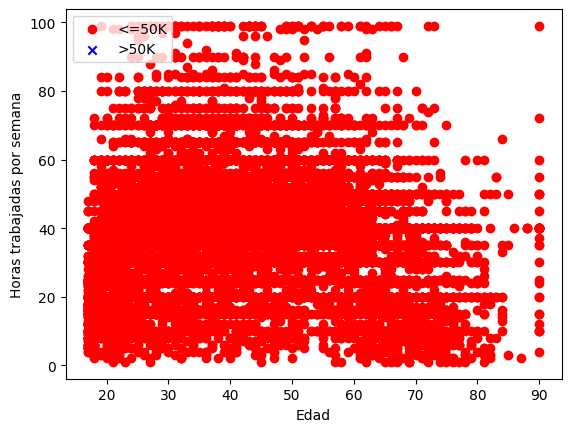

Precisión del Perceptrón en el conjunto de prueba: 80.42 %


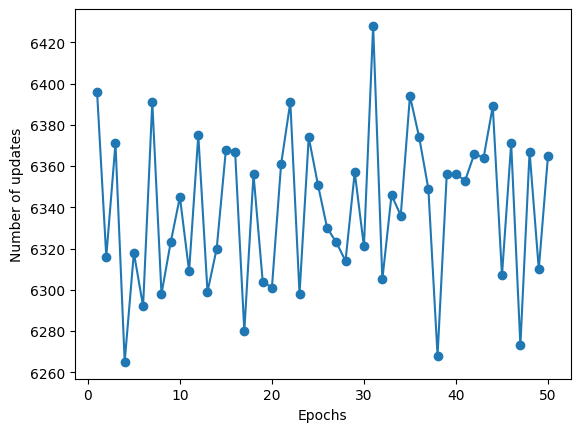

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

#------------------------------------------------------------------------------

# Cargar el conjunto de datos
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]
df = pd.read_csv(url, header=None, names=column_names, na_values=' ?', sep=',\s', engine='python')

# Manejar valores faltantes
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# Codificar variables categóricas
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('income')

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df['income'] = df['income'].map({'<=50K': -1, '>50K': 1})

# Separar características y objetivo
X = df.drop('income', axis=1).values
y = df['income'].values

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Seleccionar dos características del dataset (age y hours-per-week)
X_plot = df[['age', 'hours-per-week']].values
y_plot = np.where(df['income'] == ' >50K', 1, -1)

# Graficar los datos
plt.scatter(X_plot[y_plot == -1, 0], X_plot[y_plot == -1, 1], color='red', marker='o', label='<=50K')
plt.scatter(X_plot[y_plot == 1, 0], X_plot[y_plot == 1, 1], color='blue', marker='x', label='>50K')

plt.xlabel('Edad')
plt.ylabel('Horas trabajadas por semana')
plt.legend(loc='upper left')

plt.show()

# Entrenar el Perceptrón
ppn = Perceptron(eta=0.01, n_iter=50, random_state=1)
ppn.fit(X_train, y_train)

# Evaluar el modelo
y_pred = ppn.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print('Precisión del Perceptrón en el conjunto de prueba:', round(accuracy * 100, 2), '%')

# Visualizar errores por época
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()


# Código dividido

Se importan las bibliotecas:
- numpy -> Para operaciones matemáticas y manejo de matrices o vectores.
- pandas -> maneja datos en forma de tablas.
- matplotlib.pyplot -> Sirve para dividir los datos en conjuntos de entrenamiento y prueba.
- train_test_plit -> Sirve para dividir los datos en conjuntos de entrenamiento y prueba.
- StandartScaler -> Sirve para preparar datos para ser utilizados en el modelo.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

Se define la clase perceptrón.
Se crea el contructor __init__ con sus parametros:
- eta -> Tasa de aprendizaje
- n_iter -> Epocas
- random_state -> Sirve para que el generador de numeros aleatorios siempre dé el mismo resultado y el modelo sea reproducible.

In [ ]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta  # Tasa de aprendizaje (cuánto ajustamos el modelo en cada actualización)
        self.n_iter = n_iter  # Número de iteraciones o épocas (cuántas veces verá el conjunto de datos)
        self.random_state = random_state  # Para inicializar los pesos aleatoriamente de manera reproducible


  El metodo fit entrena al modelo. Se inicializan los pesos aleatoriamente y se guarda una lista de errores (Cambios realizados en cada época)

In [ ]:
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])  # Inicializar los pesos
        self.errors_ = []


En este bloque se estan ajustando los pesos (self.w_) cada vez que el modelo predice incorrectamente, de acuerdo con la tasa de aprendizaje (eta).

In [ ]:
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))  # Calculamos cuánto ajustar los pesos
                self.w_[1:] += update * xi  # Actualizamos los pesos
                self.w_[0] += update  # Actualizamos el sesgo (peso independiente de las características)
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self


En el siguiente bloque se crean dos metodos:
- net_input: Calcula la suma ponderada de las características y los pesos.
- Predict: Si el resultado es mayor o igual a 0, predice 1, si es menor, predice -1.

In [ ]:
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]  # Producto punto de las características y los pesos

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)  # Predice 1 o -1 según el valor calculado


Se carga del conjunto de datos Census, ademas se especifican las columnas y se asegura de que los valores faltantes sean manejados correctamente.

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
                'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
                'hours-per-week', 'native-country', 'income']
df = pd.read_csv(url, header=None, names=column_names, na_values=' ?', sep=',\s', engine='python')

Se eliminan las filas que tienen valores faltantess y se reinician los índices.

In [ ]:
df.dropna(inplace=True)  # Eliminamos filas con valores faltantes
df.reset_index(drop=True, inplace=True)

Debido a que los datos tienen variables categoricas se necesitan convertir en números ya que el perceptrón no puede trabajar directamente con texto.
Se utiliza LabelEncoder para esta transformación.

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
categorical_cols.remove('income')
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])  # Convertimos texto a números

Se separan datos en:
- x -> Características (edad, horas trabajadas...).
- y -> Objetivo a predecir (ingresos mayores o menores a 50k).

In [ ]:
X = df.drop('income', axis=1).values
y = df['income'].values

Las características son escaladas para que todas tengan la misma magnitud, lo que ayuda al perceptrón a converger más rápido.

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Escalar para que todas las características tengan la misma importancia


Se dividen los datos en un conjunto de entrenamiento (80%) y un conjunto de prueba (20%).
- x_train, y_train -> Permiten entrenar el modelo.
- x_test, y_test -> Se usan para pruebas de funcionamiento en datos nuevos.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


Se realiza una visualización de datos utilizando age y hours-per-week, pero al ser una representación para solo 2 datos no permite apreciar el resultado vemas adecuado.

In [ ]:
X_plot = df[['age', 'hours-per-week']].values
y_plot = np.where(df['income'] == ' >50K', 1, -1)

plt.scatter(X_plot[y_plot == -1, 0], X_plot[y_plot == -1, 1], color='red', marker='o', label='<=50K')
plt.scatter(X_plot[y_plot == 1, 0], X_plot[y_plot == 1, 1], color='blue', marker='x', label='>50K')

plt.xlabel('Edad')
plt.ylabel('Horas trabajadas por semana')
plt.legend(loc='upper left')
plt.show()


Se entrena el perceptrón con los datos de entrenamiento.

In [ ]:
ppn = Perceptron(eta=0.01, n_iter=50, random_state=1)
ppn.fit(X_train, y_train)


Se realiza una evaluacion de presición usando los datos de prueba (Se calcula la precisión, que es el porcentaje de prediciones correctas).

In [ ]:
y_pred = ppn.predict(X_test)
accuracy = np.mean(y_pred == y_test)
print(f'Precisión del Perceptrón en el conjunto de prueba: {accuracy * 100:.2f}%')


Se grafican los errores que ocurren en cada época, lo que nos ayuda a ver si el modelo está aprendiendo.

In [ ]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()
